# Изучение спектров атомов вотодора и молекулы йода
### Бутаков Иван, Гладков Андрей; Б05-873

В работе изучаются сериальные закономерности в оптическом спектре водорода, спектр поглощения паров йода в видимой области.

## Импортирование данных

In [1]:
import pandas
import numpy

# Градуировка.
neon = pandas.read_csv('neon.csv', sep = ' ', header = 0, dtype = numpy.float64)
mercury = pandas.read_csv('mercury.csv', sep = ' ', header = 0, dtype = numpy.float64)

# Данные барабана.
hydrogen = pandas.read_csv('hydrogen.csv', sep = ' ', header = 0, dtype = numpy.float64)
iodine = pandas.read_csv('iodine.csv', sep = ' ', header = 0, dtype = numpy.float64)

In [2]:
neon

,lambda,x
0,7032.41,2608.0
1,6929.47,2570.0
2,6717.04,2504.0
3,6678.28,2486.0
4,6598.95,2464.0
5,6532.88,2438.0
6,6506.53,2430.0
7,6402.24,2390.0
8,6382.99,2384.0
9,6334.42,2364.0


In [3]:
mercury

,lambda,x
0,6907.26,2564.0
1,6771.85,2502.0
2,6233.51,2324.0
3,6100.43,2284.0
4,6000.69,2254.0
5,5790.67,2118.0
6,5770.14,2106.0
7,5460.75,1924.0
8,5290.74,1614.0
9,5137.94,1598.0


In [4]:
hydrogen

,x
0,2446.0
1,1442.0
2,796.0


In [5]:
iodine

,x
0,2346.0
1,2252.0
2,1610.0


In [6]:
x_err = 10.0
lambda_err = 1.0

## Интерполяция

### Приближение многочленом

In [7]:
# Убрать выпадающие точки.
_mercury_edited = mercury.drop(mercury[(mercury['x'] > 1500.0) & (mercury['x'] < 1800.0)].index, inplace=False)

In [8]:
X = numpy.concatenate((neon['x'].to_numpy(), _mercury_edited['x'].to_numpy()))
Y = numpy.concatenate((neon['lambda'].to_numpy(), _mercury_edited['lambda'].to_numpy()))

In [9]:
fitted = numpy.polyfit(X, Y, deg = 3)

In [10]:
Xf = numpy.arange(min(X) - 100.0, max(X) + 100)
Yf = numpy.array([numpy.polyval(fitted, x) for x in Xf])

### График

In [11]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

In [12]:
matplotlib.rc('font', **font)

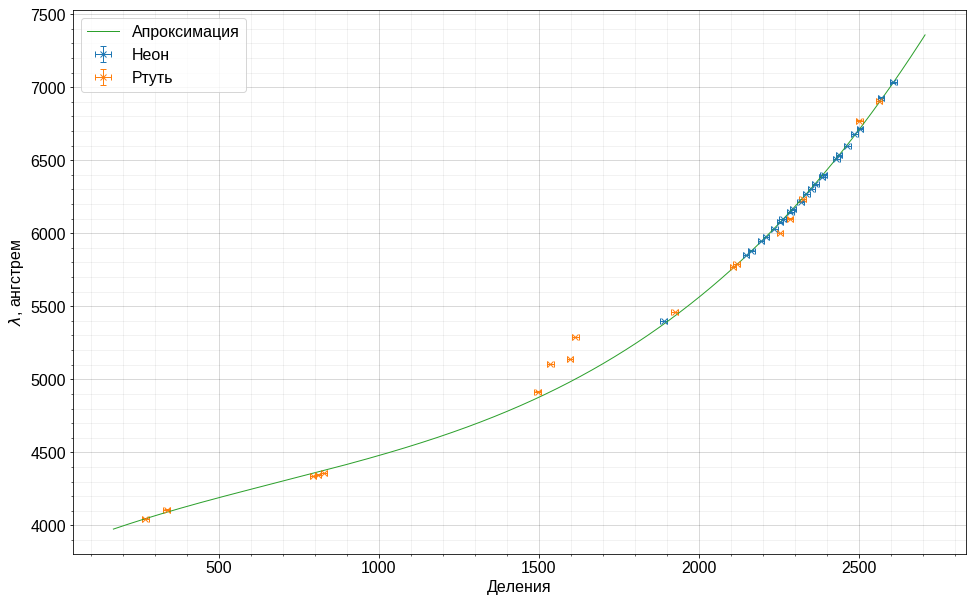

In [13]:
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(neon['x'], neon['lambda'], xerr = x_err, yerr = lambda_err,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = 'Неон')

ax.errorbar(mercury['x'], mercury['lambda'], xerr = x_err, yerr = lambda_err,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = 'Ртуть')

ax.plot(Xf, Yf, lw = 1.0, label = 'Апроксимация')

ax.set_xlabel('Деления')
ax.set_ylabel('$\lambda$, ангстрем')

ax.legend(loc='upper left')
plt.show();

## Линии водорода

Серия Бальмера:
$$
\nu = R \cdot c \cdot \left ( \frac{1}{2^2} - \frac{1}{n^2} \right ) \qquad \Longrightarrow \qquad
\lambda = \frac{c}{\nu} = \frac{(2 n)^2}{R \cdot (n - 2)(n + 2)}
$$

$$
\frac{\lambda_{i+1}}{\lambda_i} = \frac{(2i + 2)^2 \cdot (i - 2)(i + 2)}{(2i)^2 \cdot (i - 1)(i + 3)}
$$

In [14]:
X_hydrogen = hydrogen['x'].to_numpy()
Y_hydrogen = numpy.polyval(fitted, X_hydrogen)

numpy.set_printoptions(precision=3)
print(Y_hydrogen)

[6556.032 4819.538 4357.337]


In [15]:
Y_hydrogen_ratios = numpy.array([Y_hydrogen[i+1] / Y_hydrogen[i] for i in range(len(Y_hydrogen) - 1)])
print(Y_hydrogen_ratios)

[0.735 0.904]


Видно, что полученные отношения с большой точностью ($ \Delta r \approx 0.01 $, $\displaystyle \frac{\Delta r}{r} \approx 0.015 $) совпадают с соотношениями $\displaystyle \frac{\lambda_4}{\lambda_3} = 0.741 $, $\displaystyle \frac{\lambda_5}{\lambda_4} = 0.893 $.

Значит, наблюдались первые три линии серии Бальмера (т.к. $ i \in \{ 3, 4, 5 \} $).

In [16]:
Balmer_n = [3, 4, 5]

$$
\lambda = \frac{(2 n)^2}{R \cdot (n^2 - 2^2)} \qquad \Longrightarrow \qquad R = \frac{(2 n)^2}{\lambda \cdot (n^2 - 2^2)}
$$

In [17]:
c = 299792458e10
print("Скорость света, ангстрем/с: %.5e" % c)

Скорость света, ангстрем/с: 2.99792e+18


In [18]:
R = numpy.array([(2 * Balmer_n[i])**2 / (Y_hydrogen[i] * (Balmer_n[i]**2 - 4)) for i in range(len(Y_hydrogen))])

In [19]:
R_mean = numpy.mean(R)
R_std = numpy.std(R)

numpy.set_printoptions(precision=6)
print(R)
print("Постоянная Ридберга, 1/ангстрем: %.3e ± %.1e" % (R_mean, R_std))

R_true = 109737.3157 * 1e-8
print("Постоянная Ридберга (истинная), 1/ангстрем: %.5e" % R_true)
print("Итоговая ошибка относительно табличного значения (абс. 1/ангстрем, отн.): %.3e, %.3e" % (R_mean - R_true, (R_mean - R_true) / R_true))

[0.001098 0.001107 0.001093]
Постоянная Ридберга, 1/ангстрем: 1.099e-03 ± 5.7e-06
Постоянная Ридберга (истинная), 1/ангстрем: 1.09737e-03
Итоговая ошибка относительно табличного значения (абс. 1/ангстрем, отн.): 1.853e-06, 1.689e-03


## Спектр иода

Определим длины волн поглощения йода по градуировочной кривой монохроматора:

In [20]:
X_iodine = iodine['x'].to_numpy()
Y_iodine = numpy.array([numpy.polyval(fitted, x) for x in X_iodine])
print ("1. ", X_iodine[0], "дел -", '%.2f'%Y_iodine[0], "Å.")
print ("2. ", X_iodine[1], "дел -", '%.2f'%Y_iodine[1], "Å.")
print ("3. ", X_iodine[2], "дел -", '%.2f'%Y_iodine[2], "Å.")

1.  2346.0 дел - 6294.70 Å.
2.  2252.0 дел - 6070.34 Å.
3.  1610.0 дел - 4997.01 Å.


In [21]:
lambda_10 = Y_iodine[0]
lambda_15 = Y_iodine[1]
lambda_end = Y_iodine[2]

In [22]:
h =  4.135667669 / 1.0e15
print("Постоянная Планка, эВ·с: %.5e" % h)

Постоянная Планка, эВ·с: 4.13567e-15


In [23]:
# Табличные данные.
D_1 = 1.5
E_A = 0.96
h_nu_1 = 0.027

Вычислим энергию колебательного кванта возбужденного состояния молекулы йода: $h\nu_2=\frac15(h\nu_{1,5}-h\nu_{1,0}) = \frac{hc}{5}(\frac{1}{\lambda_{1,5}}-\frac{1}{\lambda_{1,0}})$.

In [24]:
h_nu_2 = h * c * (1.0 / lambda_15 - 1.0 / lambda_10) * 0.2
print("h_nu_2, эВ: %.3e" % h_nu_2)

h_nu_2, эВ: 1.456e-02


Для границы схождения спетра имеем энергию $ \displaystyle D_1 = \frac {hc}{\lambda_{\text{конец}}} $.

In [25]:
h_nu_end_exp = h * c / lambda_end
print("Измеренное h_nu_end, эВ: %.3e" % h_nu_end_exp)

h_nu_end = 2.44
print("Табличное h_nu_end, эВ: %.3e" % h_nu_end)
print("Итоговая ошибка относительно табличного значения (абс. эВ, отн.): %.3e, %.3e" %
      (h_nu_end_exp - h_nu_end, (h_nu_end_exp - h_nu_end) / h_nu_end))

Измеренное h_nu_end, эВ: 2.481e+00
Табличное h_nu_end, эВ: 2.440e+00
Итоговая ошибка относительно табличного значения (абс. эВ, отн.): 4.117e-02, 1.687e-02


$ \displaystyle D_2 = D_1 \cdot \frac{h \nu_2}{h \nu_1} $

In [26]:
D_2 = D_1 * h_nu_2 / h_nu_1
print("D_2, эВ: %.3e" % D_2)

D_2, эВ: 8.089e-01


Согласно рис. 2 в лабораторном практикуме, $h\nu_{эл} = D_1+E_A-D_2 = h \nu_{гр} - D_2 $.

In [27]:
h_nu_el = h_nu_end - D_2
print("h_nu_el, эВ: %.3e" % h_nu_el)

h_nu_el, эВ: 1.631e+00
